In [192]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [193]:
df.shape

(891, 12)

In [194]:
#this particluar dataset has 891 rows and 12 columns

In [195]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [196]:
#here is the statistical summary of the dataset

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [198]:
#There is no categorical column exists in dataset so encoding is not needed.

In [199]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [200]:
#Checking if null values present in dataset. Yes, there are several null values in dataset. 

In [201]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [202]:
#This is not giving solution/ not removing null values.


In [203]:
df.dropna(inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [204]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [205]:
#so, here we have removed all the null values and no Null values are present as of now in dataset.

# EDA

In [206]:
import warnings
warnings.simplefilter('ignore')

In [207]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
  
#Countplot 
survived_count = df.groupby('Survived')['Survived'].count()
survived_count

Survived
0     60
1    123
Name: Survived, dtype: int64

In [208]:
#Here, we're getting information about the passengers who survived the drowning and which are not. 60 passengers did not survived and 123 passengers survived this. Now , i'm going to show it to over graph for more convenience.

Here I will use bar() function coming from Matplotlib module. The function is pretty easy to understand. The two parameters that we need to pass is just the index name and its values.

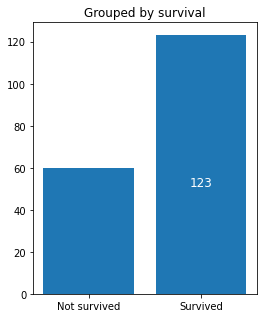

In [209]:
#grouped by survival

plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

In [210]:
#now i'm gonna find out the number of survived persons based on their gender.

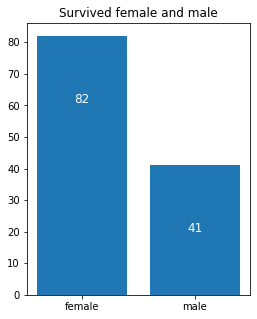

In [211]:
survived_sex = df.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

In [212]:
#Here it is easily understandable that the graph is plotted on the basis of Gender (Survived).

UDA(Univariate data analysis)

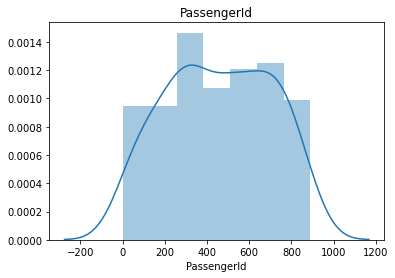

In [213]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.distplot(df["PassengerId"])
plt.title("PassengerId")
plt.show()

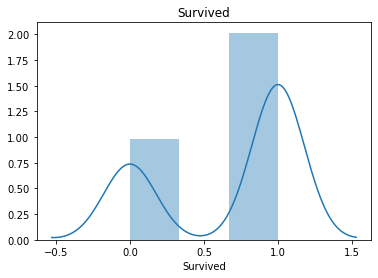

In [214]:
sns.distplot(df["Survived"])
plt.title("Survived")
plt.show()

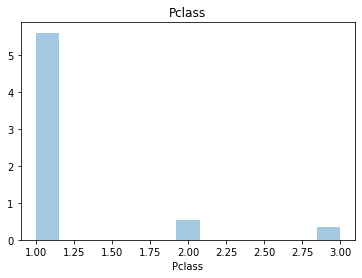

In [215]:
sns.distplot(df["Pclass"])
plt.title("Pclass")
plt.show()

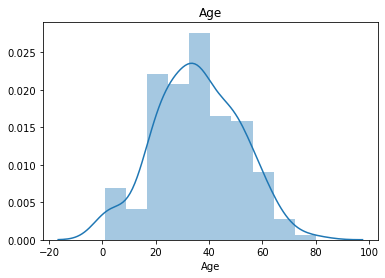

In [216]:
sns.distplot(df["Age"])
plt.title("Age")
plt.show()

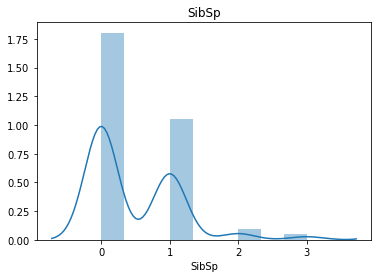

In [217]:
sns.distplot(df["SibSp"])
plt.title("SibSp")
plt.show()

In [218]:
#shows number of siblings/spouses aboarded the titanic.

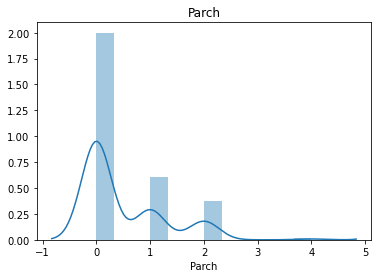

In [219]:
sns.distplot(df["Parch"])
plt.title("Parch")
plt.show()

In [220]:
#Here the graphs shows the number of parents/childrens who onboarded the Titanic.

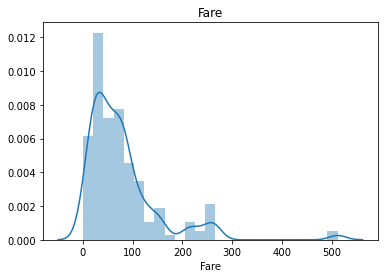

In [221]:
sns.distplot(df["Fare"])
plt.title("Fare")
plt.show()

In [222]:
#Different Fares for different class over the ship. 1st,2nd & 3rd class, hence the fares accordingly.

#Hence these are the various Univariate data analysis.

Bivariate analysis

In [223]:
#Here we make sure to use two columns for our analysis that is why the term 'Bi' is used here.

In [224]:
#Plotting scatter to check the relationship between "PassengerId" & "Survived"

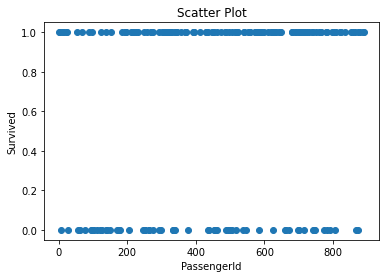

In [225]:
plt.scatter(df["PassengerId"],df["Survived"])
plt.title("Scatter Plot")
plt.xlabel("PassengerId")
plt.ylabel("Survived")
plt.show()

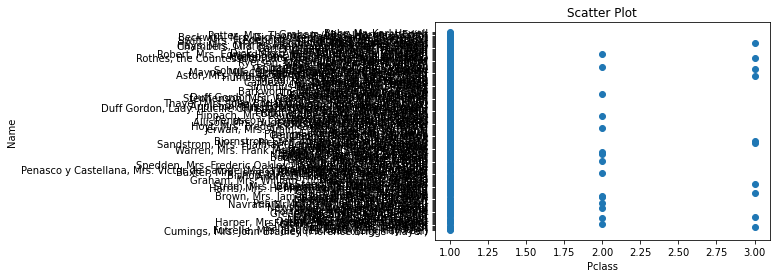

In [226]:
plt.scatter(df["Pclass"],df["Name"])
plt.title("Scatter Plot")
plt.xlabel("Pclass")
plt.ylabel("Name")
plt.show()

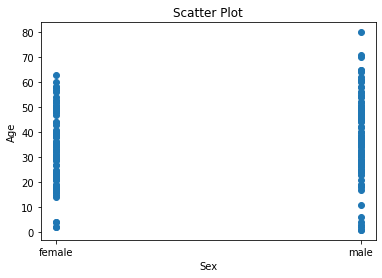

In [227]:
plt.scatter(df["Sex"],df["Age"])
plt.title("Scatter Plot")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

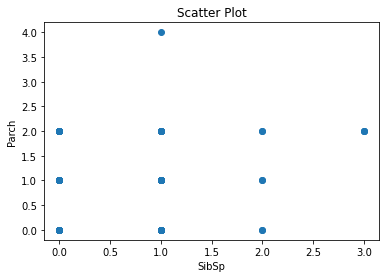

In [228]:
plt.scatter(df["SibSp"],df["Parch"])
plt.title("Scatter Plot")
plt.xlabel("SibSp")
plt.ylabel("Parch")
plt.show()

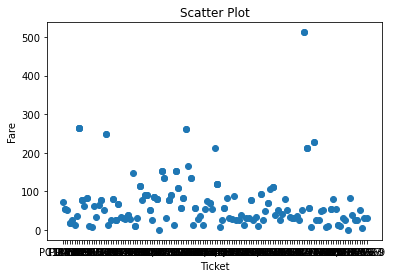

In [229]:
plt.scatter(df["Ticket"],df["Fare"])
plt.title("Scatter Plot")
plt.xlabel("Ticket")
plt.ylabel("Fare")
plt.show()

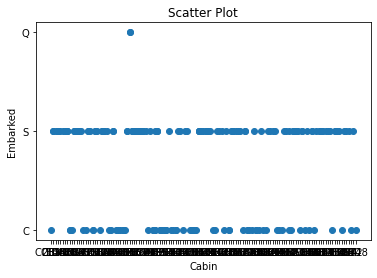

In [230]:
plt.scatter(df["Cabin"],df["Embarked"])
plt.title("Scatter Plot")
plt.xlabel("Cabin")
plt.ylabel("Embarked")
plt.show()

#Multivariate Analysis

In [231]:
#we will be using multiple columns together for our graphication representation.

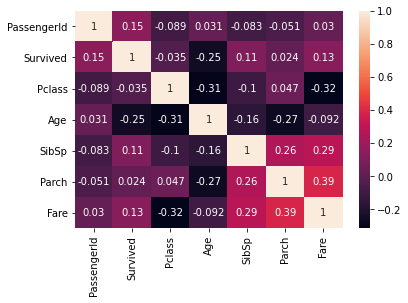

In [232]:
#Checking correlation using heatmap.

corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

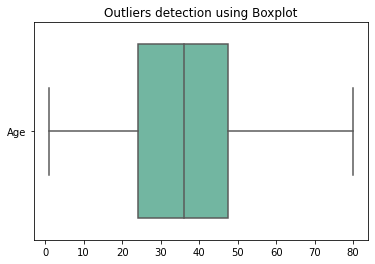

In [233]:
#checking outliers using boxplot
sns.boxplot(data=df[["Age","Sex"]],orient="h",palette="Set2")
plt.title("Outliers detection using Boxplot")
plt.show()

In [234]:
#Checking skewness if exists
df.skew()

PassengerId   -0.053773
Survived      -0.739427
Pclass         2.681459
Age            0.009676
SibSp          1.443019
Parch          1.519305
Fare           2.715883
dtype: float64

In [235]:
#separating independent and target variable

x=df.drop("Age",axis=1)
y=df["Age"]

In [242]:
#Scaling the dataset using Standardscaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(X)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from skelearn.metrics import r2_score

best_rstate=0
accu=0
for i in range (10,100)
x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=0.25,randomstate=i)

mod=LinearRegression
mod.fit(x_train,y_train)
y_pred=mod.predict(x_test)
tempaccu=r2-score(y_test,y_pred)
if tempaccu>accu:
    accu=tempaccu
    best_rstate=i
    
print(f" Best accuracy{accu*100}found on random_state{best_rstate}")    

SyntaxError: invalid syntax (<ipython-input-242-a056fccd3e26>, line 14)

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [246]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [247]:
# We can see here that the FamilySize column appears as expected.

In [248]:
#there are 2 missing values in Embarked column. Since it’s not a significant number, we are just gonna eliminate them:

In [249]:
df = df.dropna(subset=['Embarked'])

In [250]:
embarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_one_hot], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1


In [254]:
df['Cabin'] = df['Cabin'].fillna('U')

In [257]:
cabin_one_hot = pd.get_dummies(df['Cabin'], prefix='Cabin')
df = pd.concat([df, cabin_one_hot], axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare',
       ...
       'Cabin_F E69', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2', 'Cabin_F33',
       'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_T', 'Cabin_U'],
      dtype='object', length=163)

In [259]:
# Now i'm going to take these titles using get_title() function that we declare manually by myself.

In [261]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()
df['Title'] = df['Name'].apply(get_title)

In [262]:
title_one_hot = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([df, title_one_hot], axis=1)

In [265]:
sex_one_hot = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, sex_one_hot], axis=1)

In [266]:
# Feature engineering :Age

In [267]:
age_median = df.groupby('Title')['Age'].median()
age_median

Title
Capt            70.0
Col             58.0
Don             40.0
Dr              46.5
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           3.5
Miss            21.0
Mlle            24.0
Mme             24.0
Mr              30.0
Mrs             35.0
Ms              28.0
Rev             46.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

In [268]:
#Here the median of each title is obtained.


In [269]:
def fill_age(x):
    for index, age in zip(age_median.index, age_median.values):
        if x['Title'] == index:
            return age

In [270]:
df['Age'] = df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)

In [271]:
df.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
                     ..
Title_the Countess    0
Sex_female            0
Sex_male              0
Sex_female            0
Sex_male              0
Length: 332, dtype: int64

In [272]:
#we need to drop all the columns that contain categorical data using drop() method.

In [273]:
df = df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title'], axis=1)

In [276]:
df = (df-df.min())/(df.max()-df.min())


Model Training : Logistic Regression

In [278]:
y = df['Survived'].values
X = df.iloc[:,1:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)

In [281]:
# Now what we need to do is to initialize a LogisticRegression() object, which I put in clf variable.

In [282]:
clf = LogisticRegression()

In [283]:
clf.fit(X_train, y_train)

LogisticRegression()

In [284]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8734177215189873
0.8426966292134831


In [285]:
#here's the accuracy score.

In [286]:
# here we need to predict our train data itself and store the predictions in train_preds variable.

In [287]:
train_preds = clf.predict(X_train)

In [288]:
cm = confusion_matrix(y_train, train_preds)

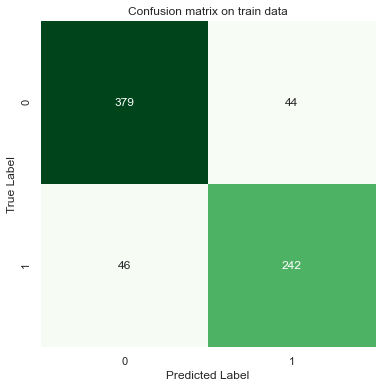

In [290]:
#Displaying confusion matrix on train data

plt.figure(figsize=(6,6))
plt.title('Confusion matrix on train data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [291]:
# Predicting test data
test_preds = clf.predict(X_test)
cm = confusion_matrix(y_test, test_preds)


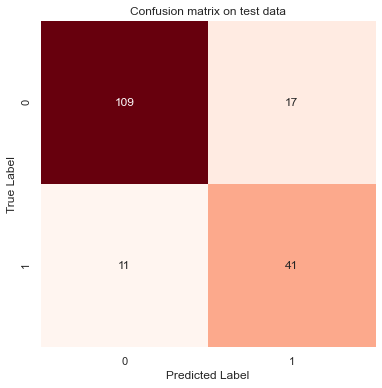

In [292]:
# Displaying confusion matrix on test data
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on test data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Reds, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()